In [2]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from pycocotools import mask as cocomask


In [21]:
a = np.random.randint(3, size=(4, 4), dtype=np.uint8)
b = np.random.randint(3, size=(4, 4), dtype=np.uint8)
c = np.zeros((4, 4), dtype=np.uint8)

print(a)
print(b)
print(c)

[[2 1 0 0]
 [2 0 0 2]
 [2 2 2 0]
 [2 2 1 0]]
[[2 2 2 1]
 [1 1 1 1]
 [0 0 0 0]
 [2 0 1 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [11]:
def rle_from_binary(prediction):
    prediction = np.asfortranarray(prediction)
    return cocomask.encode(prediction)

In [7]:
def get_segmentations(labeled):
    nr_true = labeled.max()
    segmentations = []
    for i in range(1, nr_true + 1):
        msk = labeled == i
        segmentation = rle_from_binary(msk.astype('uint8'))
        segmentation['counts'] = segmentation['counts'].decode("UTF-8")
        segmentations.append(segmentation)
    return segmentations


In [8]:
def compute_ious(gt, predictions):
    gt_ = get_segmentations(gt)
    predictions_ = get_segmentations(predictions)

    if len(gt_) == 0 and len(predictions_) == 0:
        return np.ones((1, 1))
    elif len(gt_) != 0 and len(predictions_) == 0:
        return np.zeros((1, 1))
    else:
        iscrowd = [0 for _ in predictions_]
        ious = cocomask.iou(gt_, predictions_, iscrowd)
        if not np.array(ious).size:
            ious = np.zeros((1, 1))
        return ious

In [9]:
def compute_precision_at(ious, threshold):
    mx1 = np.max(ious, axis=0)
    mx2 = np.max(ious, axis=1)
    tp = np.sum(mx2 >= threshold)
    fp = np.sum(mx2 < threshold)
    fn = np.sum(mx1 < threshold)
    return float(tp) / (tp + fp + fn)

In [15]:
a_ = get_segmentations(a)
b_ = get_segmentations(b)
c_ = get_segmentations(c)

In [22]:
compute_ious(a, b), compute_ious(a, c), compute_ious(b, c), compute_ious(c, c)

(array([[0.14285714, 0.2       ],
        [0.16666667, 0.2       ]]),
 array([[0.]]),
 array([[0.]]),
 array([[1.]]))

In [26]:
x = np.array([0.3, 0.5, 0.7, 1.0])
ths = np.arange(0.5, 1.0, 0.05)

In [35]:
score = x[:, np.newaxis] >= ths
print(score)

[[False False False False False False False False False False]
 [ True False False False False False False False False False]
 [ True  True  True  True False False False False False False]
 [ True  True  True  True  True  True  True  True  True  True]]


In [37]:
np.mean(score, axis=1)

array([0. , 0.1, 0.4, 1. ])

In [2]:
img_true_file = "36ad52a2e8.png"
img_pred_file = "cc97e87765.png"

y_true = img_to_array(load_img(img_true_file, grayscale=True))
y_pred = img_to_array(load_img(img_pred_file, grayscale=True))
print('y_true.shape: {}, y_pred.shape: {}'.format(y_true.shape, y_pred.shape))

y_true.shape: (101, 101, 1), y_pred.shape: (101, 101, 1)


In [66]:
np.arange(0.5, 1, 0.05).shape

(10,)

In [67]:
for i in np.arange(0.5, 1, 0.05):
    print(i)

0.5
0.55
0.6000000000000001
0.6500000000000001
0.7000000000000002
0.7500000000000002
0.8000000000000003
0.8500000000000003
0.9000000000000004
0.9500000000000004


In [8]:
labels = y_true

In [4]:
true_objects, pred_objects = 2, 2

In [5]:
intersection = np.histogram2d(y_true.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

In [6]:
intersection

array([[4179.,  280.],
       [ 383., 5359.]])

In [9]:
area_true = np.histogram(labels, bins=true_objects)[0]
area_pred = np.histogram(y_pred, bins=pred_objects)[0]
area_true = np.expand_dims(area_true, -1)
area_pred = np.expand_dims(area_pred, 0)

In [10]:
area_true, area_pred

(array([[4459],
        [5742]]), array([[4562, 5639]]))

In [12]:
union = area_true + area_pred - intersection
print(union)

[[4842. 9818.]
 [9921. 6022.]]


In [13]:
intersection = intersection[1:, 1:]
print(intersection)

[[5359.]]


In [14]:
union = union[1:, 1:]

In [15]:
print(union)

[[6022.]]


In [16]:
iou = intersection / union

In [57]:
iou

array([[0.88990369]])

In [17]:
import pycocotools

ModuleNotFoundError: No module named 'pycocotools'

In [61]:
np.sum(matches, axis=1)

array([1])

In [62]:
np.sum(matches, axis=0)

array([1])

In [ ]:
def precision_at(threshold, iou):
    matches = iou > threshold
    tp = np.sum(matches, axis=1) == 1
    fp = np.sum(matches, axis=0) == 0
    fn = np.sum(matches, axis=1) == 0
    

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
xedges = [0, 1, 3, 5]
yedges = [0, 2, 3, 4, 6]

In [14]:
x = np.random.normal(2, 1, 100)
y = np.random.normal(1, 1, 100)

In [18]:
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T

In [20]:
H

array([[ 7., 43., 10.],
       [ 0.,  5.,  3.],
       [ 0.,  4.,  0.],
       [ 0.,  0.,  0.]])

In [21]:
xedges

array([0., 1., 3., 5.])

In [22]:
yedges

array([0., 2., 3., 4., 6.])

In [ ]:
 >>> fig = plt.figure(figsize=(7, 3))
    >>> ax = fig.add_subplot(131, title='imshow: square bins')
    >>> plt.imshow(H, interpolation='nearest', origin='low',
    ...         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    
    :func:`pcolormesh <matplotlib.pyplot.pcolormesh>` can display actual edges:
    
    >>> ax = fig.add_subplot(132, title='pcolormesh: actual edges',
    ...         aspect='equal')
    >>> X, Y = np.meshgrid(xedges, yedges)
    >>> ax.pcolormesh(X, Y, H)
    
    :class:`NonUniformImage <matplotlib.image.NonUniformImage>` can be used to
    display actual bin edges with interpolation:
    
    >>> ax = fig.add_subplot(133, title='NonUniformImage: interpolated',
    ...         aspect='equal', xlim=xedges[[0, -1]], ylim=yedges[[0, -1]])
    >>> im = mpl.image.NonUniformImage(ax, interpolation='bilinear')
    >>> xcenters = (xedges[:-1] + xedges[1:]) / 2
    >>> ycenters = (yedges[:-1] + yedges[1:]) / 2
    >>> im.set_data(xcenters, ycenters, H)
    >>> ax.images.append(im)
    >>> plt.show()

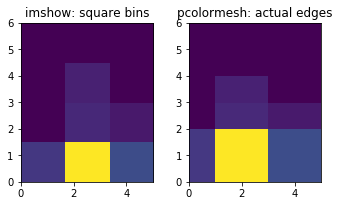

In [33]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title="imshow: square bins")
ax.imshow(H, interpolation="nearest", origin="low", extent=(xedges[0], xedges[-1], yedges[0], yedges[-1]))

ax = fig.add_subplot(132, title="pcolormesh: actual edges", aspect="equal")
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H)

# ax = fig.add_subplot(133, title="NonUniformImage: interpolated", aspect="equal", xlim=xedges[[0, -1]], ylim=yedges[[0, -1]])
# im = mpl.image.NonUniformImage(ax, interpolation="bilinear")
# xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2
# im.set_data(xcenters, ycenters, H)
# ax.images.append(im)

plt.tight_layout()
plt.show()

In [11]:
help(np.histogram2d)

Help on function histogram2d in module numpy.lib.twodim_base:

histogram2d(x, y, bins=10, range=None, normed=False, weights=None)
    Compute the bi-dimensional histogram of two data samples.
    
    Parameters
    ----------
    x : array_like, shape (N,)
        An array containing the x coordinates of the points to be
        histogrammed.
    y : array_like, shape (N,)
        An array containing the y coordinates of the points to be
        histogrammed.
    bins : int or array_like or [int, int] or [array, array], optional
        The bin specification:
    
          * If int, the number of bins for the two dimensions (nx=ny=bins).
          * If array_like, the bin edges for the two dimensions
            (x_edges=y_edges=bins).
          * If [int, int], the number of bins in each dimension
            (nx, ny = bins).
          * If [array, array], the bin edges in each dimension
            (x_edges, y_edges = bins).
          * A combination [int, array] or [array, int], w